# LetsGrow More: Data Science Internship

### Task 2: (Intermediate Level Task) Exploratory Data Analysis on Terrorism Dataset

#### Intern name : Disha Jadhav

#### Step 1 : Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2 : Loading the dataset

In [2]:
data = pd.read_csv("D:\\LetsGrow More\\globalterrorismdb.csv", encoding = "Latin", low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data=data[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
           "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
           "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [4]:
data.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                    "region_txt":"Region","provstate":"Province/State","city":"City",
                    "latitude":"Latitude","longitude":"Longitude","location":"Location",
                    "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                    "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                    "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [5]:
data.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   Latitude        177135 non-null  float64
 8   Longitude       177134 non-null  float64
 9   Location        55495 non-null   object 
 10  Summary         115562 non-null  object 
 11  Attack Type     181691 non-null  object 
 12  Target Type     181691 non-null  object 
 13  Group Name      181691 non-null  object 
 14  Motive          50561 non-null   object 
 15  Weapon Type     181691 non-null  object 
 16  Killed          171378 non-null  float64
 17  Wounded   

In [7]:
data.shape

(181691, 19)

In [8]:
data.isnull().sum()

Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 434
Latitude            4556
Longitude           4557
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Group Name             0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

In [9]:
data["Killed"]=data["Killed"].fillna(0)
data["Wounded"]=data["Wounded"].fillna(0)
data["Casualty"]=data["Killed"]+data["Wounded"]

In [10]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


- The data consists information from Year 1970 to 2017.
- The maximum peoples killed in attack weree 1570.

#### Step 3 : Performing EDA

#### Regionwise Analysis

In [11]:
data.Region.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0, 0.5, 'No of terrorist attack')

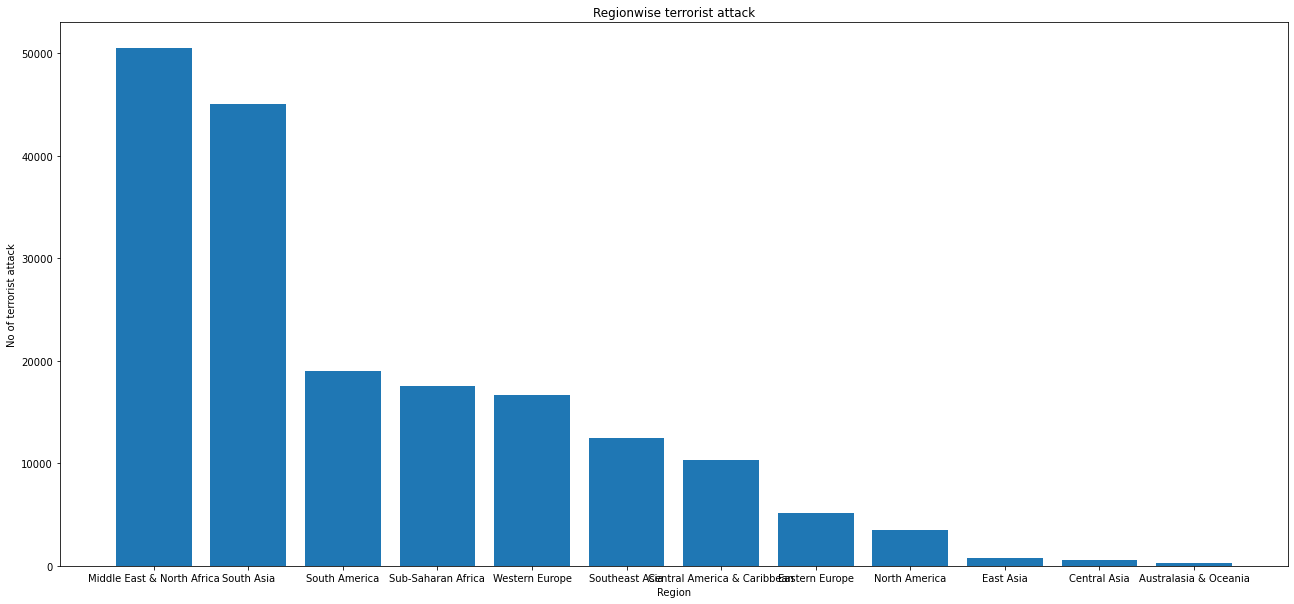

In [12]:
plt.figure(figsize=(22,10))
plt.bar(x=data.Region.value_counts().index,height=data.Region.value_counts().values)
plt.title('Regionwise terrorist attack')
plt.xlabel('Region')
plt.ylabel('No of terrorist attack')

- From above bar diagram it is seen that the Middle east and North Africa region has highest terrorist attack.

In [13]:
killed=data["Region"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Region","Region":"Killed"}).set_index("Region")
killed.head()

,Killed
Region,
Australasia & Oceania,282
Central America & Caribbean,10344
Central Asia,563
East Asia,802
Eastern Europe,5144


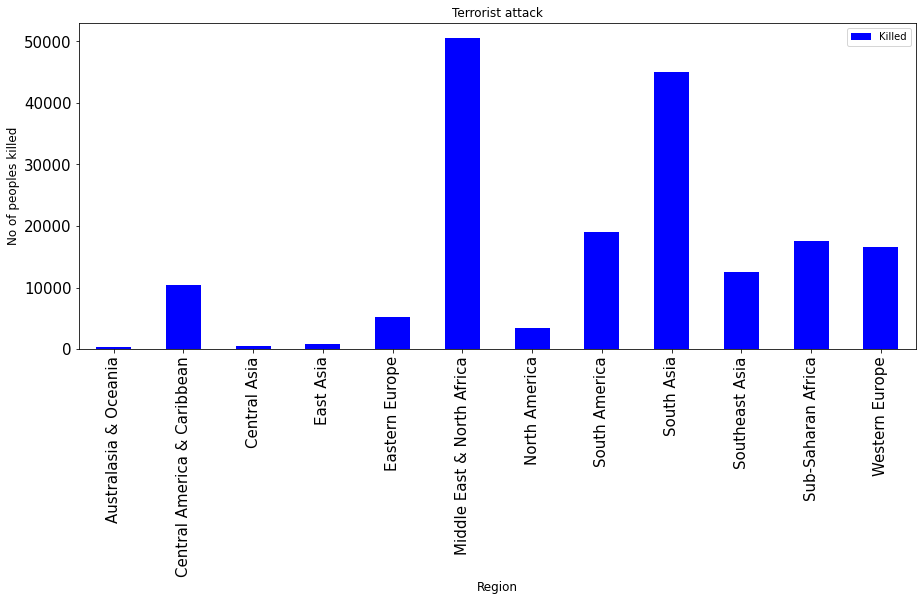

In [14]:
killed.plot(kind="bar",color="blue",figsize=(15,6),fontsize=15)
plt.title('Terrorist attack',fontsize=12)
plt.xlabel('Region',fontsize=12)
plt.ylabel('No of peoples killed',fontsize=12)
plt.show()

#### Yearly Analysis

In [15]:
attacks=data["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


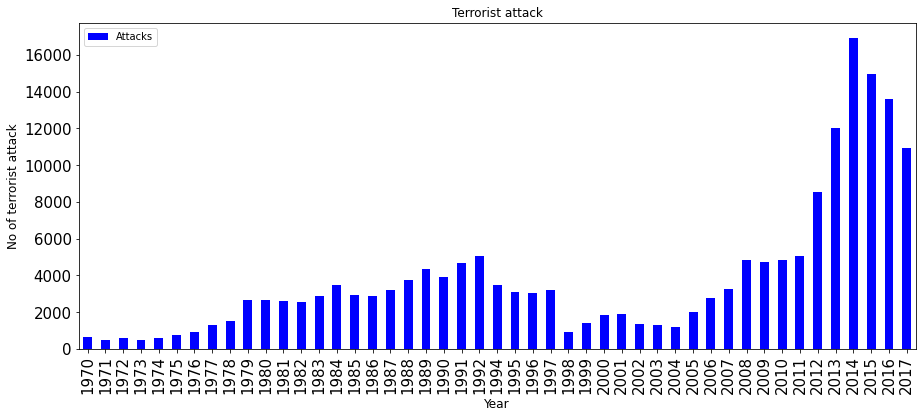

In [16]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=15)
plt.title('Terrorist attack',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('No of terrorist attack',fontsize=12)
plt.show()

- From above bar diagram it is seen that in 2014 there are maximum terrorist attack wheareas in 1971 the number of terrorist attacks are minimum.

- The maximum no of peoples killed in region Middle East & North Africa.

#### Countrywise analysis

In [17]:
country=data["Country"].value_counts().head(10)
country

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

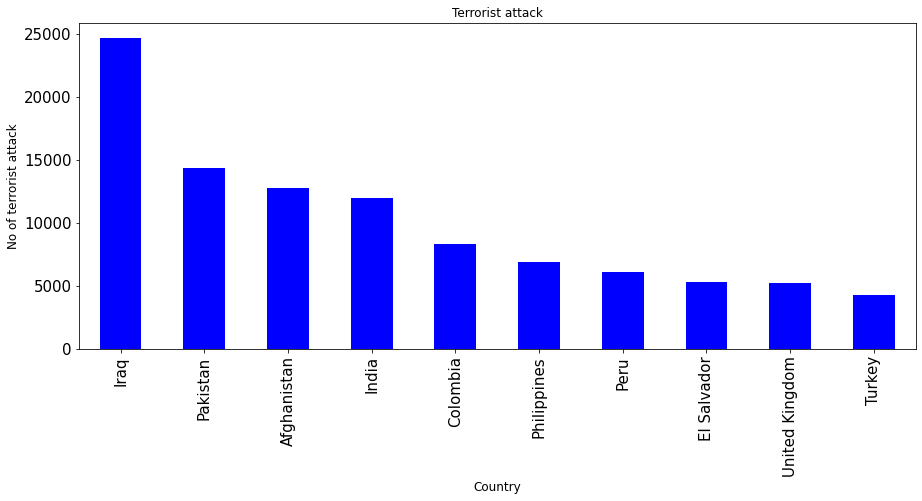

In [18]:
country.plot(kind="bar",color="blue",figsize=(15,6),fontsize=15)
plt.title('Terrorist attack',fontsize=12)
plt.xlabel('Country',fontsize=12)
plt.ylabel('No of terrorist attack',fontsize=12)
plt.show()

- The Iraq country has highest terrorist attack whereas the Turkey is the country which has minimum terrorist attack.

In [19]:
count=data[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
count.head(10)

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


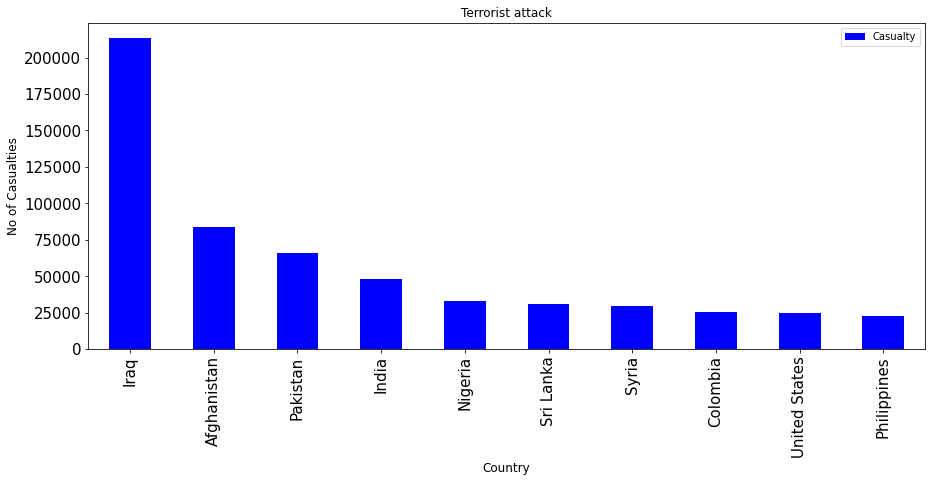

In [20]:
count[:10].plot(kind="bar",color="blue",figsize=(15,6),fontsize=15)
plt.title('Terrorist attack',fontsize=12)
plt.xlabel('Country',fontsize=12)
plt.ylabel('No of Casualties',fontsize=12)
plt.show()

In [21]:
countk=data[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
countk.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


In [22]:
countw=data[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
countw.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


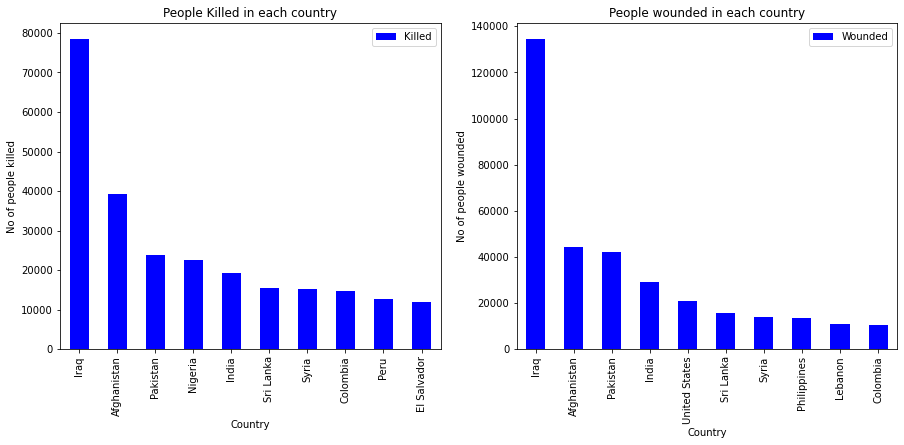

In [23]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
countk[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each country")
ax0.set_xlabel("Country")
ax0.set_ylabel("No of people killed")

#Wounded
countw[:10].plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People wounded in each country")
ax1.set_xlabel("Country")
ax1.set_ylabel("No of people wounded")

plt.show()


- The most of the people killed and wounded in Iraq Country.

#### Attack Type

In [24]:
at=data["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

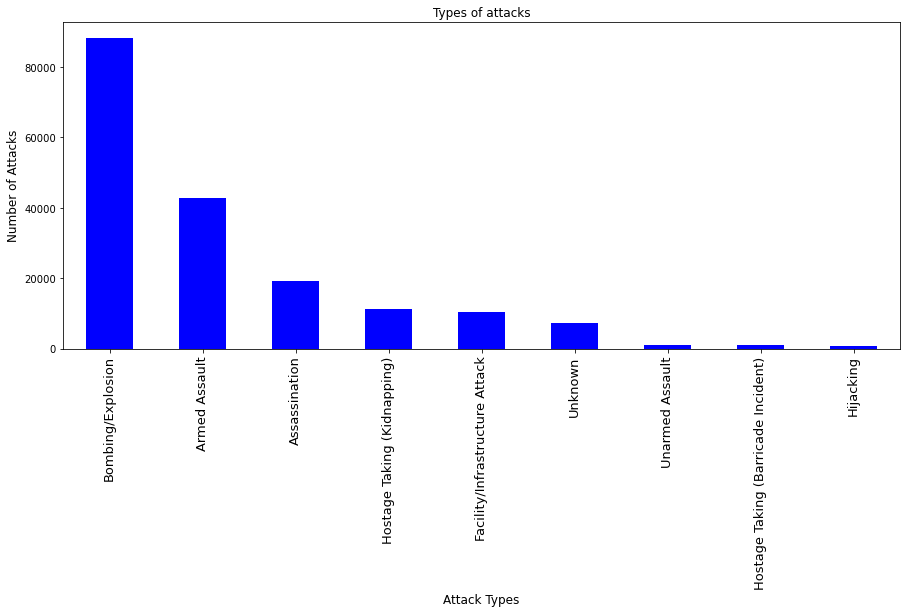

In [25]:
at.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Types of attacks",fontsize=12)
plt.xlabel("Attack Types",fontsize=12)
plt.xticks(fontsize=13)
plt.ylabel("Number of Attacks",fontsize=12)
plt.show()

- The bombing\Explosion are highly used attack type.

#### Target Type

In [26]:
tt=data["Target Type"].value_counts()
tt

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

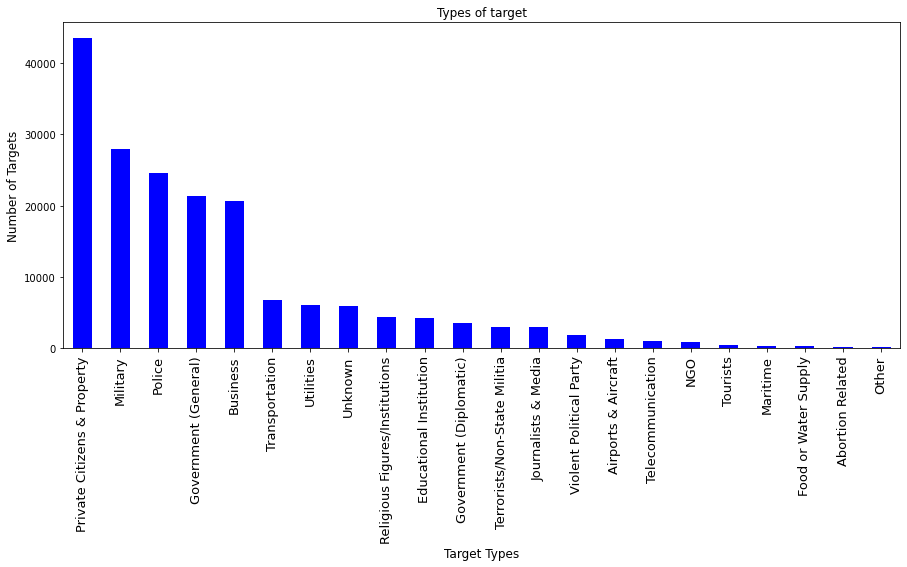

In [27]:
tt.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Types of target",fontsize=12)
plt.xlabel("Target Types",fontsize=12)
plt.xticks(fontsize=13)
plt.ylabel("Number of Targets",fontsize=12)
plt.show()

- The most targeted are Private Citizens & Property.

# Thank You!